DATA PREPROCESSING
Loading data...
✓ Data loaded: (319, 39)
Missing values before cleaning: 0
✓ Missing values after cleaning: 0
✓ Categorical variables encoded
✓ Features: (319, 38), Target: (319,)
✓ Target distribution: {0: np.int64(161), 1: np.int64(158)}
✓ Features scaled
✓ All files saved to models/ directory

MODEL TRAINING AND EVALUATION

Training Logistic Regression...
  Accuracy:  0.7812
  Precision: 0.7824
  Recall:    0.7812
  F1-Score:  0.7810
  AUC-ROC:   0.8828

Training Decision Tree...
  Accuracy:  0.6562
  Precision: 0.6569
  Recall:    0.6562
  F1-Score:  0.6559
  AUC-ROC:   0.6562

Training Random Forest...
  Accuracy:  0.8125
  Precision: 0.8125
  Recall:    0.8125
  F1-Score:  0.8125
  AUC-ROC:   0.8740

Training SVM...
  Accuracy:  0.7500
  Precision: 0.7510
  Recall:    0.7500
  F1-Score:  0.7498
  AUC-ROC:   0.8838

Training KNN...


  File "C:\Users\mayur\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\mayur\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mayur\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

  Accuracy:  0.6875
  Precision: 0.6905
  Recall:    0.6875
  F1-Score:  0.6863
  AUC-ROC:   0.6704

Training Naive Bayes...
  Accuracy:  0.5469
  Precision: 0.7623
  Recall:    0.5469
  F1-Score:  0.4298
  AUC-ROC:   0.7520

Training Gradient Boosting...
  Accuracy:  0.7812
  Precision: 0.7857
  Recall:    0.7812
  F1-Score:  0.7804
  AUC-ROC:   0.8330

Training XGBoost...
  Accuracy:  0.8594
  Precision: 0.8684
  Recall:    0.8594
  F1-Score:  0.8585
  AUC-ROC:   0.8916

Training LightGBM...
  Accuracy:  0.8281
  Precision: 0.8363
  Recall:    0.8281
  F1-Score:  0.8271
  AUC-ROC:   0.8994

Training CatBoost...
  Accuracy:  0.8125
  Precision: 0.8137
  Recall:    0.8125
  F1-Score:  0.8123
  AUC-ROC:   0.8926

CREATING VISUALIZATIONS


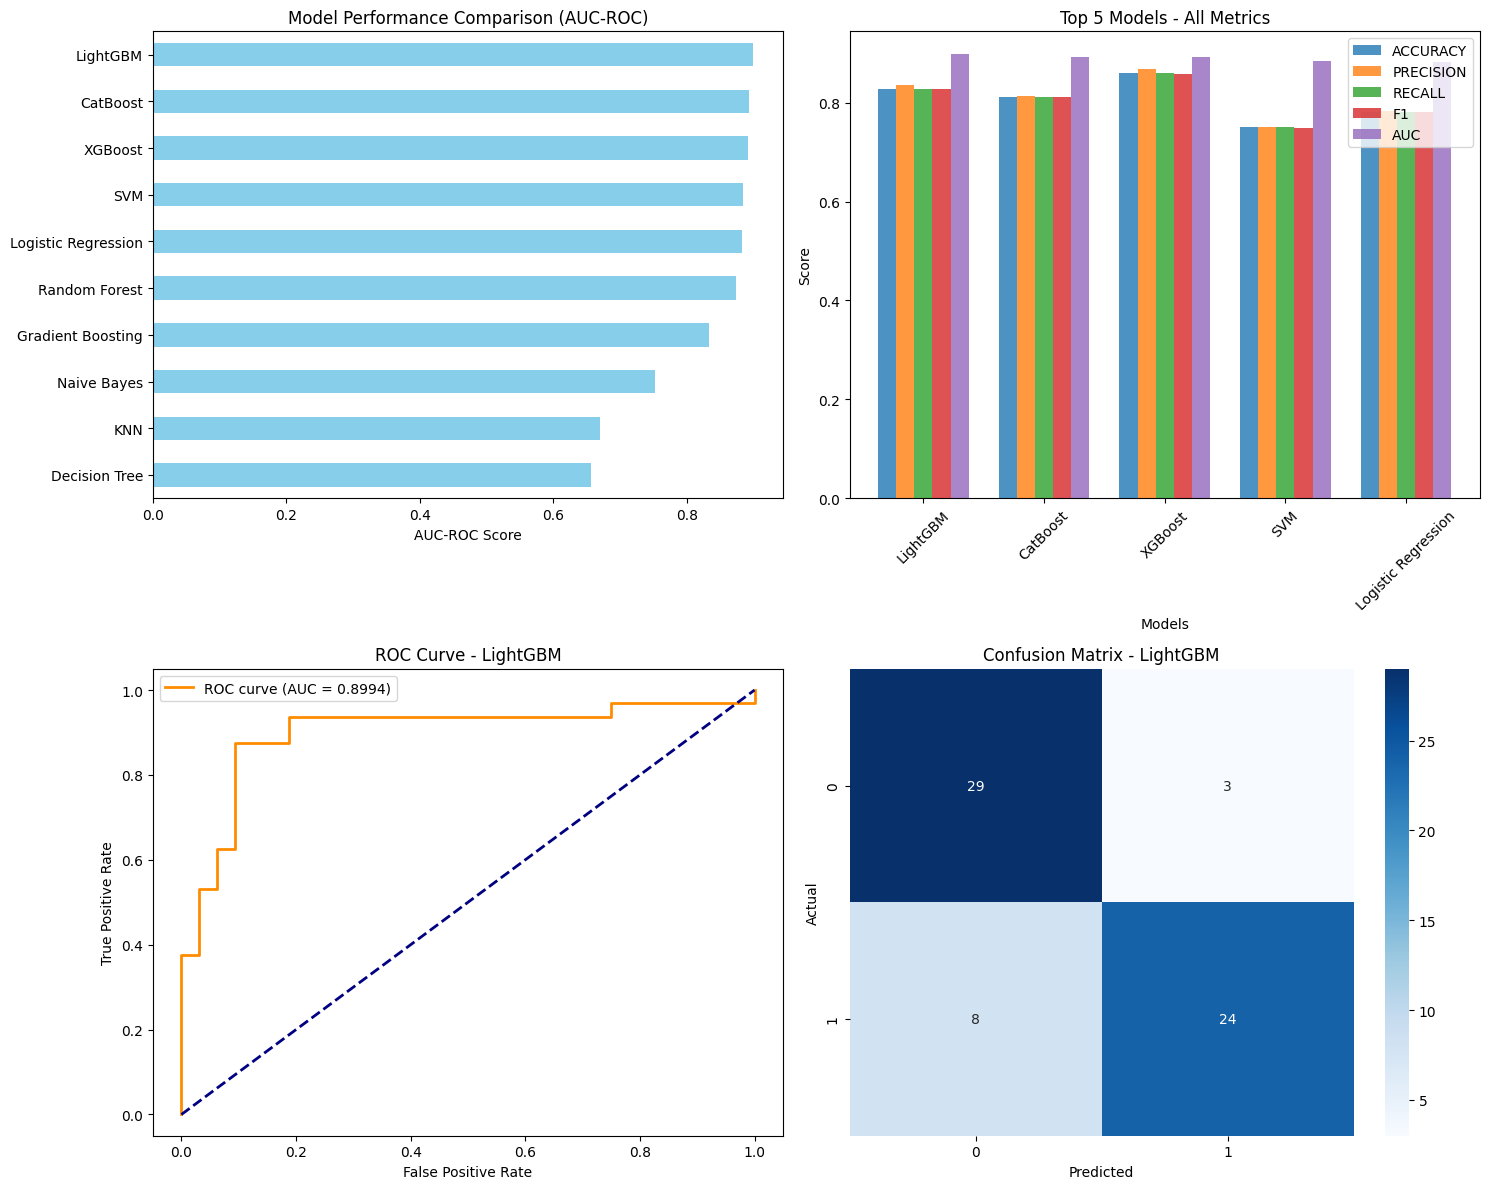

✓ Visualizations saved to 'models/results_visualization.png'

FINAL RESULTS

All Model Results:
                     accuracy  precision  recall      f1     auc
Logistic Regression    0.7812     0.7824  0.7812  0.7810  0.8828
Decision Tree          0.6562     0.6569  0.6562  0.6559  0.6562
Random Forest          0.8125     0.8125  0.8125  0.8125  0.8740
SVM                    0.7500     0.7510  0.7500  0.7498  0.8838
KNN                    0.6875     0.6905  0.6875  0.6863  0.6704
Naive Bayes            0.5469     0.7623  0.5469  0.4298  0.7520
Gradient Boosting      0.7812     0.7857  0.7812  0.7804  0.8330
XGBoost                0.8594     0.8684  0.8594  0.8585  0.8916
LightGBM               0.8281     0.8363  0.8281  0.8271  0.8994
CatBoost               0.8125     0.8137  0.8125  0.8123  0.8926

Best Model: LightGBM
Best AUC Score: 0.8994

Files saved:
  ✓ models/best_model.pkl
  ✓ models/model_metadata.pkl
  ✓ models/results_visualization.png

🎉 ANALYSIS COMPLETED SUCCESSFULLY! 🎉

In [5]:
# Complete Gallstone Analysis Pipeline
# Preprocessing and model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, classification_report, 
                           confusion_matrix, roc_curve)
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Try to import advanced models (install if needed)
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")
    XGBOOST_AVAILABLE = False

try:
    from lightgbm import LGBMClassifier
    LIGHTGBM_AVAILABLE = True
except ImportError:
    print("LightGBM not installed. Install with: pip install lightgbm")
    LIGHTGBM_AVAILABLE = False

try:
    from catboost import CatBoostClassifier
    CATBOOST_AVAILABLE = True
except ImportError:
    print("CatBoost not installed. Install with: pip install catboost")
    CATBOOST_AVAILABLE = False

def preprocess_data(file_path='GallStoneData.xlsx'):
    """Quick and effective data preprocessing"""
    print("=" * 60)
    print("DATA PREPROCESSING")
    print("=" * 60)
    
    # Load data
    print("Loading data...")
    df = pd.read_excel(file_path)
    print(f"✓ Data loaded: {df.shape}")
    
    # Handle missing values
    missing_before = df.isnull().sum().sum()
    print(f"Missing values before cleaning: {missing_before}")
    
    # Fill missing values
    for col in df.select_dtypes(include=[np.number]).columns:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())
    
    for col in df.select_dtypes(include=['object']).columns:
        if col != 'Gallstone Status' and df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
    
    print(f"✓ Missing values after cleaning: {df.isnull().sum().sum()}")
    
    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        if col != 'Gallstone Status':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    
    print("✓ Categorical variables encoded")
    
    # Prepare features and target
    X = df.drop('Gallstone Status', axis=1)
    y = df['Gallstone Status']
    
    print(f"✓ Features: {X.shape}, Target: {y.shape}")
    print(f"✓ Target distribution: {dict(y.value_counts())}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    print("✓ Features scaled")
    
    # Save everything
    os.makedirs('models', exist_ok=True)
    joblib.dump(X_train, 'models/X_train.pkl')
    joblib.dump(X_test, 'models/X_test.pkl')
    joblib.dump(y_train, 'models/y_train.pkl')
    joblib.dump(y_test, 'models/y_test.pkl')
    joblib.dump(scaler, 'models/scaler.pkl')
    joblib.dump(label_encoders, 'models/label_encoders.pkl')
    
    print("✓ All files saved to models/ directory")
    
    return X_train, X_test, y_train, y_test, scaler, label_encoders

def get_models():
    """Get all available models"""
    models = {
        # Basic models
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'SVM': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    # Add advanced models if available
    if XGBOOST_AVAILABLE:
        models['XGBoost'] = XGBClassifier(
            random_state=42, n_estimators=100, eval_metric='logloss'
        )
    
    if LIGHTGBM_AVAILABLE:
        models['LightGBM'] = LGBMClassifier(
            random_state=42, n_estimators=100, verbose=-1
        )
    
    if CATBOOST_AVAILABLE:
        models['CatBoost'] = CatBoostClassifier(
            random_state=42, iterations=100, verbose=False
        )
    
    return models

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """Train and evaluate all models"""
    print("\n" + "=" * 60)
    print("MODEL TRAINING AND EVALUATION")
    print("=" * 60)
    
    models = get_models()
    results = {}
    trained_models = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Train model
        model.fit(X_train, y_train)
        trained_models[name] = model
        
        # Make predictions
        y_pred = model.predict(X_test)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = y_pred
        
        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'f1': f1_score(y_test, y_pred, average='weighted'),
            'auc': roc_auc_score(y_test, y_pred_proba)
        }
        
        results[name] = metrics
        
        print(f"  Accuracy:  {metrics['accuracy']:.4f}")
        print(f"  Precision: {metrics['precision']:.4f}")
        print(f"  Recall:    {metrics['recall']:.4f}")
        print(f"  F1-Score:  {metrics['f1']:.4f}")
        print(f"  AUC-ROC:   {metrics['auc']:.4f}")
    
    return results, trained_models

def create_visualizations(results, best_model, best_model_name, X_test, y_test):
    """Create comprehensive visualizations"""
    print("\n" + "=" * 60)
    print("CREATING VISUALIZATIONS")
    print("=" * 60)
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results).T
    
    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Model Performance Comparison
    auc_scores = results_df['auc'].sort_values(ascending=True)
    auc_scores.plot(kind='barh', ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Model Performance Comparison (AUC-ROC)')
    axes[0, 0].set_xlabel('AUC-ROC Score')
    
    # 2. All Metrics for Top 5 Models
    top_models = results_df.nlargest(5, 'auc')
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    x = np.arange(len(top_models))
    width = 0.15
    
    for i, metric in enumerate(metrics):
        axes[0, 1].bar(x + i*width, top_models[metric], width, 
                      label=metric.upper(), alpha=0.8)
    
    axes[0, 1].set_title('Top 5 Models - All Metrics')
    axes[0, 1].set_xlabel('Models')
    axes[0, 1].set_ylabel('Score')
    axes[0, 1].set_xticks(x + width * 2)
    axes[0, 1].set_xticklabels(top_models.index, rotation=45)
    axes[0, 1].legend()
    
    # 3. ROC Curve
    if hasattr(best_model, 'predict_proba'):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, 
                       label=f'ROC curve (AUC = {auc_score:.4f})')
        axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[1, 0].set_title(f'ROC Curve - {best_model_name}')
        axes[1, 0].set_xlabel('False Positive Rate')
        axes[1, 0].set_ylabel('True Positive Rate')
        axes[1, 0].legend()
    
    # 4. Confusion Matrix
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
    axes[1, 1].set_title(f'Confusion Matrix - {best_model_name}')
    axes[1, 1].set_ylabel('Actual')
    axes[1, 1].set_xlabel('Predicted')
    
    plt.tight_layout()
    plt.savefig('models/results_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Visualizations saved to 'models/results_visualization.png'")
    
    return results_df

def main():
    """Main execution function"""
    
    try:
        # Step 1: Preprocess data
        X_train, X_test, y_train, y_test, scaler, label_encoders = preprocess_data()
        
        # Step 2: Train models
        results, trained_models = train_and_evaluate_models(X_train, X_test, y_train, y_test)
        
        # Step 3: Find best model
        results_df = pd.DataFrame(results).T
        best_model_name = results_df['auc'].idxmax()
        best_model = trained_models[best_model_name]
        best_auc = results_df.loc[best_model_name, 'auc']
        
        # Step 4: Create visualizations
        results_df = create_visualizations(results, best_model, best_model_name, X_test, y_test)
        
        # Step 5: Save best model
        joblib.dump(best_model, 'models/best_model.pkl')
        joblib.dump({
            'model_name': best_model_name,
            'auc_score': best_auc,
            'all_results': results
        }, 'models/model_metadata.pkl')
        
        # Step 6: Print final results
        print("\n" + "=" * 60)
        print("FINAL RESULTS")
        print("=" * 60)
        
        print("\nAll Model Results:")
        print(results_df.round(4))
        
        print(f"\nBest Model: {best_model_name}")
        print(f"Best AUC Score: {best_auc:.4f}")
        
        print(f"\nFiles saved:")
        print(f"  ✓ models/best_model.pkl")
        print(f"  ✓ models/model_metadata.pkl")
        print(f"  ✓ models/results_visualization.png")
        
        print("\n🎉 ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
        
        return results_df, best_model, best_model_name
        
    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None

# Run the complete analysis
if __name__ == "__main__":
    results_df, best_model, best_model_name = main()